<a href="https://colab.research.google.com/github/jordicorronspell-2828/TFG-Vulnerabilitat-Energetica/blob/main/prova_TFG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Llibreries carregades correctament!
Dades simulades generades.

--- PRIMERES 5 FILES DE LA TAULA ---


,id_familia,ingressos_anuals,membres_llar,any_construccio,consum_kwh_mensual,vulnerabilitat_risc
0,1,30757,5,1988,165,0
1,2,28270,1,2014,233,0
2,3,27777,2,1986,178,0
3,4,36624,1,1996,370,0
4,5,22749,3,1971,411,0



--- ESTADÍSTIQUES DESCRIPTIVES ---


,id_familia,ingressos_anuals,membres_llar,any_construccio,consum_kwh_mensual,vulnerabilitat_risc
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.00
mean,50.500000,27891.790000,2.800000,1981.630000,374.800000,0.01
std,29.011492,9114.236585,1.442501,19.108227,133.299541,0.10
min,1.000000,12005.000000,1.000000,1950.000000,158.000000,0.00
25%,25.750000,20029.500000,1.000000,1967.000000,248.000000,0.00
50%,50.500000,27215.500000,3.000000,1980.000000,397.000000,0.00
75%,75.250000,36039.500000,4.000000,1998.000000,488.500000,0.00
max,100.000000,44837.000000,5.000000,2019.000000,594.000000,1.00


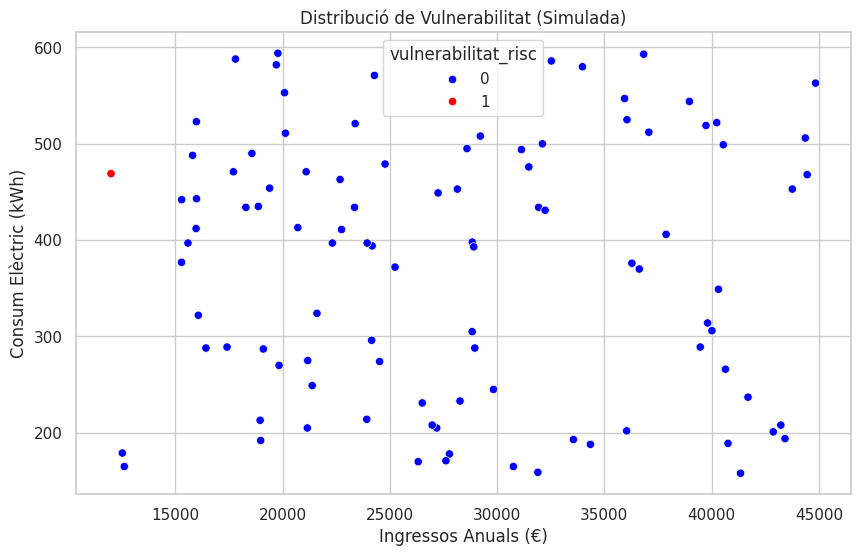

In [1]:
# --- BLOCC 1: IMPORTACIÓ DE LLIBRERIES ---
# Aquestes són les eines estàndard que citaràs a la memòria
import pandas as pd  # Per gestionar taules de dades (com Excel però supervitaminat)
import numpy as np   # Per càlculs matemàtics
import matplotlib.pyplot as plt # Per fer gràfiques
import seaborn as sns # Per fer gràfiques més boniques

# Configuració visual (opcional, perquè es vegi bé)
sns.set_theme(style="whitegrid")
print("Llibreries carregades correctament!")

# --- BLOCC 2: GENERACIÓ DE DADES DE PROVA (Simulació) ---
# Com que encara no tenim l'Excel de 'Climate Ready', en creem un de simulat
# per comprovar que el codi funciona.

# Creem dades per a 100 famílies fictícies
data = {
    'id_familia': range(1, 101),
    'ingressos_anuals': np.random.randint(12000, 45000, 100), # Ingressos entre 12k i 45k
    'membres_llar': np.random.randint(1, 6, 100), # Entre 1 i 5 persones
    'any_construccio': np.random.randint(1950, 2020, 100), # Edificis del 1950 al 2020
    'consum_kwh_mensual': np.random.randint(150, 600, 100) # Consum elèctric
}

# Ho convertim en un "DataFrame" (la taula mestra de Python)
df = pd.DataFrame(data)

# Creem una variable objectiu (Target) simulada: 'vulnerabilitat_risc'
# Suposem (molt simplificat) que si guanyen poc i gasten molt, tenen risc (1), si no (0)
ratio = (df['consum_kwh_mensual'] * 0.25 * 12) / df['ingressos_anuals'] # 0.25€ preu kwh aprox
df['vulnerabilitat_risc'] = np.where(ratio > 0.10, 1, 0) # Si gasten més del 10% en llum -> Risc

print("Dades simulades generades.")

# --- BLOCC 3: EXPLORACIÓ INICIAL (El que va a la memòria) ---
# Això és el que ensenyaràs al tribunal per dir "He analitzat les dades"

print("\n--- PRIMERES 5 FILES DE LA TAULA ---")
display(df.head()) # Mostra la capçalera

print("\n--- ESTADÍSTIQUES DESCRIPTIVES ---")
display(df.describe()) # Et dona mitjanes, màxims i mínims automàticament

# --- BLOCC 4: GRÀFICA BÀSICA ---
# Visualitzem la relació entre Ingressos i Consum pintant els vulnerables
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df,
    x='ingressos_anuals',
    y='consum_kwh_mensual',
    hue='vulnerabilitat_risc', # Els pinta de color diferent si són vulnerables
    palette={0: 'blue', 1: 'red'}
)
plt.title("Distribució de Vulnerabilitat (Simulada)")
plt.xlabel("Ingressos Anuals (€)")
plt.ylabel("Consum Elèctric (kWh)")
plt.show()